## ■ 4장. 우리가 직접 학습을 시켜서 가중치와 바이어스를 생성

### * 2층 신경망 클래스에 포함된 함수들

1. __init함수 :__ 신경망 구현시 처음 생성할 가중치와 바이어스를 구성하는 함수
2. __predict 함수 :__ 입력값과 가중치를 받아 예측값을 출력하는 함수
3. __loss 함수 :__ 예측값을 교차엔트로피 함수에 넣어 오차를 출력하는 함수
4. __accuracy 함수 :__ 예측값과 target(정답)을 가지고 정확도를 출력하는 함수
5. __numerical_gradient 함수 :__ 가중치와 바이어스의 각각의 기울기를 출력하는 함수

## 예제6. TwoLayerNet 클래스에 신경망의 정확도를 확인하는 accuracy 함수를 생성하시오.

In [ ]:
def accuracy(self, x, t):
    y = self.predict(x) # 확률백터 출력 [0.1, 0.2, 0.1, ........0.1] 10개
    y = np.argmax(y, axis=1) # 확률백터의 최대원소의 인덱스 번호 출력 
                             # 숫자 8로 예측
    t = np.argmax(t, axis =1) # [0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 에서의 최대원소 인덱스를 출력
                              # 최대원소의 인덱스 번호 : 숫자 5가 정답
    accuracy = np.sum(y==t) / float(x.shape[0])  # x.shape = [100, 784] --> x[0] = 100, x[1] = 784
                # 5 == 8면 False여서 숫자 0
                # mini batch로 인해 100장씩 사진을 넣기 때문에 np.sum을 해야한다.
    return accuracy # 0.23 출력

## 예제7. 우리가 만든 TwoLayerNet 신경망에 mnist 데이터중 테스트 데이터 100장을 흘려보내서
## 정확도를 출력하시오!

In [ ]:
"""
net = TwoLayerNet()
x,t = get_data() # 3장에 있는 get_data 코드 가져옴.

y = net.accuracy(x[:100], t[:100])
print(y)
"""

In [ ]:
# 아직은 학습이 전혀 안되어있는 상태임!!!

import sys , os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


class  TwoLayerNet:
    def  __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784,50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50,10) 
        self.params['b2'] = np.zeros(10) 

        
    def  predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y  = softmax(a2)
        
        return  y  
    

    def softmax(self,a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y,t):
        delta = 1e-7
        if y.ndim ==1:
            t=t.reshape(1,t.size)
            y=y.reshape(1,y.size)
        batch_size=y.shape[0]
        return -np.sum(t*np.log(y+delta)) / batch_size

    def loss(self,x,t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y,t)
        
        
    def  accuracy(self,x,t):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        target = np.argmax(t, axis=1) 
        accuracy = np.sum(y_hat == target) / float(x.shape[0])
    
        return  accuracy  


net = TwoLayerNet()
x, t = get_data()

y = net.accuracy(x[:100],t[:100])
print(y)

## 예제8. 사진 한장만 지금 신경망에 흘려보내고 정확도를 출력하시오

In [ ]:
# 아직은 학습이 전혀 안되어있는 상태임!!!

import sys , os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

class  TwoLayerNet:
    def  __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784,50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50,10) 
        self.params['b2'] = np.zeros(10) 

        
    def  predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y  = softmax(a2)
        
        return  y  
    

    def softmax(self,a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y,t):
        delta = 1e-7
        if y.ndim ==1:
            t=t.reshape(1,t.size)
            y=y.reshape(1,y.size)
        batch_size=y.shape[0]
        return -np.sum(t*np.log(y+delta)) / batch_size

    def loss(self,x,t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y,t)
        
        
    def  accuracy(self,x,t):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        target = np.argmax(t, axis=1) 
        accuracy = np.sum(y_hat == target) / float(x.shape[0])
    
        return  accuracy  


net = TwoLayerNet()
x, t = get_data()

y = net.accuracy(x[:1],t[:1])
print(y)

## 예제9. 예제 8번에서 입력한 이미지의 예측 숫자와 정답숫자를 출력하시오

In [ ]:
# 아직은 학습이 전혀 안되어있는 상태임!!!

import sys , os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


class  TwoLayerNet:
    def  __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784,50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50,10) 
        self.params['b2'] = np.zeros(10) 

        
    def  predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y  = softmax(a2)
        
        return  y  
    

    def softmax(self,a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y,t):
        delta = 1e-7
        if y.ndim ==1:
            t=t.reshape(1,t.size)
            y=y.reshape(1,y.size)
        batch_size=y.shape[0]
        return -np.sum(t*np.log(y+delta)) / batch_size

    def loss(self,x,t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y,t)
    
    def predict_result(self,x):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        return y_hat
     
    def accuracy(self,x,t):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        target = np.argmax(t, axis=1) 
        accuracy = np.sum(y_hat == target) / float(x.shape[0])
    
        return  accuracy  


net = TwoLayerNet()
x, t = get_data()

y = net.predict_result(x[:1])

print(y) # 예측값
print(np.argmax(t[:1], axis=1)) # 실제 정답 값

## 예제10. 학습을 시키기 위해서 기울기를 구하는 함수인 numerical_gradient 함수를 클래스에 구현하시오 ~ (p.138)

In [ ]:
# 아직은 학습이 전혀 안되어있는 상태임!!!

import sys , os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


class  TwoLayerNet:
    def  __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784,50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50,10) 
        self.params['b2'] = np.zeros(10) 

        
    def  predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y  = softmax(a2)
        
        return  y  
    

    def softmax(self,a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y,t):
        delta = 1e-7
        if y.ndim ==1:
            t=t.reshape(1,t.size)
            y=y.reshape(1,y.size)
        batch_size=y.shape[0]
        return -np.sum(t*np.log(y+delta)) / batch_size

    def loss(self,x,t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y,t)
    
    def predict_result(self,x):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        return y_hat
     
    def accuracy(self,x,t):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        target = np.argmax(t, axis=1) 
        accuracy = np.sum(y_hat == target) / float(x.shape[0])
    
        return  accuracy  

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        
        grad = {}
        grad['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grad['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grad['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grad['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

net = TwoLayerNet()
x, t = get_data()

y = net.predict_result(x[:1])

print(y) # 예측값
print(np.argmax(t[:1], axis=1)) # 실제 정답 값

## ■ 문제41.(점심시간 문제) 필기체 데이터 1장을 입력해서 신경망을 학습시키도록 
## 코드를 구현하시오.

### 학습이 되려면? 가중치 = 가중치 - 0.01 * 기울기
                       W1                        W1의 기울기
                       W2                        W2의 기울기
                       b1                        b1의 기울기
                       b2                        b2의 기울기

In [ ]:
# Final ver.
# 수치미분을 적용하고 있기 때문에 작업진행이 느리다.

import sys , os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


class  TwoLayerNet:
    def  __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784,50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50,10) 
        self.params['b2'] = np.zeros(10) 

        
    def  predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y  = softmax(a2)
        
        return  y  
    

    def softmax(self,a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y,t):
        delta = 1e-7
        if y.ndim ==1:
            t=t.reshape(1,t.size)
            y=y.reshape(1,y.size)
        batch_size=y.shape[0]
        return -np.sum(t*np.log(y+delta)) / batch_size

    def loss(self,x,t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y,t)
        
    def  predict_result(self,x):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        return  y_hat 
        
    def  accuracy(self,x,t):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        target = np.argmax(t, axis=1) 
        accuracy = np.sum(y_hat == target) / float(x.shape[0])
    
        return  accuracy 
    
    
    def  numerical_gradient(self, x, t):
 
        loss_W = lambda W : self.loss(x,t)
        grads = {} 

        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return  grads 

    

net = TwoLayerNet()
x, t = get_data()


for  i  in   range(10): # for 루프문으로 사진 1장을 10번 학습
    x_batch = x[:1]
    t_batch = t[:1]
    grad = net.numerical_gradient( x_batch, t_batch ) # grad = 기울기

    for  key  in  ('W1','W2','b1','b2'):
        net.params[key] -= 0.01 * grad[key]  # W1, W2, b1, b2 값들을 갱신

    acc = net.accuracy(x_batch, t_batch)
    print (acc) 

## 문제42. 내가 다운 받은 사진 하나를 흑백처리 하시오!

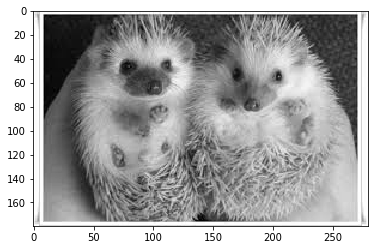

(180, 280)
(50400,)


In [10]:
j = 'D:\\hedgedogs\\5.jpg' # 파일 경로 및 이름 입력.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb): # 흑백으로 바꾸는 코드

    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114]) # 이렇게 내적하면 흑백으로 바뀜 

img = mpimg.imread(j) # 컬러사진으로 불러오기

gray = rgb2gray(img) #흑백으로 바꾸기

plt.imshow(gray, cmap = plt.get_cmap('gray'))

plt.show()
print(gray.shape)

a = np.array(gray)
x = a.flatten()
print(x.shape)

## 문제43. 점심시간에 만든 신경망에 내가 스크롤링한 사진을 한장 넣어보시오!
##  32x32로 사이즈로 줄인것을 줄이시오.

In [ ]:
import sys , os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


class  TwoLayerNet:
    def  __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(1024,50) # 32 x 32 = 1024
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50,10) 
        self.params['b2'] = np.zeros(10) 

        
    def  predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y  = softmax(a2)
        
        return  y  
    

    def softmax(self,a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y,t):
        delta = 1e-7
        if y.ndim ==1:
            t=t.reshape(1,t.size)
            y=y.reshape(1,y.size)
        batch_size=y.shape[0]
        return -np.sum(t*np.log(y+delta)) / batch_size

    def loss(self,x,t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y,t)
        
    def  predict_result(self,x):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        return  y_hat 
        
    def  accuracy(self,x,t):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        target = np.argmax(t, axis=1) 
        accuracy = np.sum(y_hat == target) / float(x.shape[0])
    
        return  accuracy 
    
    
    def  numerical_gradient(self, x, t):
 
        loss_W = lambda W : self.loss(x,t)
        grads = {} 

        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return  grads 

    

net = TwoLayerNet()
x, t = get_data()



j = 'D:\\resizehedgedogs\\1.jpg'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread(j)
gray = rgb2gray(img)
a = np.array(gray)
x= a.flatten()
x = x.reshape(1,1024)
print(x.shape)


for  i  in   range(10):
    x_batch = x
    t_batch = t[:1]
    grad = net.numerical_gradient( x_batch, t_batch )

    for  key  in  ('W1','W2','b1','b2'):
        net.params[key] -= 0.01 * grad[key] 

    acc = net.accuracy(x_batch, t_batch)
    print (acc) 

## 문제44. mnist 필기체 데이터를 100장씩 신경망에 입력해서 신경망이 학습할 수 있도록 하는데   ## 이미지 100장을 추출할 때 확률적으로 랜덤하게 추출될 수 있도록 코드를 구현하시오

In [ ]:
# Final ver.
# 수치미분을 적용하고 있기 때문에 작업진행이 느리다.
# 100장씩 학습하기 때문에 더더욱 느림.
# 복원추출로하나 비복원추출로하나 별반 차이는 없다. (Test 결과)

import sys , os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


class  TwoLayerNet:
    def  __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784,50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50,10) 
        self.params['b2'] = np.zeros(10) 

        
    def  predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y  = softmax(a2)
        
        return  y  
    

    def softmax(self,a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y,t):
        delta = 1e-7
        if y.ndim ==1:
            t=t.reshape(1,t.size)
            y=y.reshape(1,y.size)
        batch_size=y.shape[0]
        return -np.sum(t*np.log(y+delta)) / batch_size

    def loss(self,x,t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y,t)
        
    def  predict_result(self,x):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        return  y_hat 
        
    def  accuracy(self,x,t):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        target = np.argmax(t, axis=1) 
        accuracy = np.sum(y_hat == target) / float(x.shape[0])
    
        return  accuracy 
    
    
    def  numerical_gradient(self, x, t):
 
        loss_W = lambda W : self.loss(x,t)
        grads = {} 

        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return  grads 

    

net = TwoLayerNet()
x, t = get_data()


for  i  in  range(10): # for 루프문으로 mnist 사진 1장을 10번 학습
    batch_mask = np.random.choice(60000,100) # 복원추출
    x_batch = x[batch_mask]
    t_batch = t[batch_mask]
    grad = net.numerical_gradient( x_batch, t_batch ) # grad = 기울기

    for  key  in  ('W1','W2','b1','b2'):
        net.params[key] -= 0.01 * grad[key]  # W1, W2, b1, b2 값들을 갱신

    acc = net.accuracy(x_batch, t_batch)
    print (acc) 

## ■ 힘들게 학습 시켜서 만들어 놓은 가중치를 파일로 생성하는 방법

__" pickle을 이용하면 된다. "__

* pickle 모듈을 이용하는 예제

In [11]:
import pickle

list = ['a','b','c']

with open("d:\\list.pkl", "wb") as f:
    pickle.dump(list, f)

* pickle 파일을 파이썬으로 로드하는 예제

In [12]:
import pickle

with open("d:\\list.pkl", "rb") as f:
    data = pickle.load(f)

print(data)

['a', 'b', 'c']


## 문제45. 문제44번(사진 100장 넣고 학습 시킨 신경망)에서 만든 가중치와 바이어스를   
## pickle 파일로 내리시오~ ( pickle 파일 이름은 : mnist_weight.pkl )

학습 신경망 코드 맨 아래줄에 피클 파일 생성하는 코드를 넣으면됨.

In [ ]:
# Final ver.
# 수치미분을 적용하고 있기 때문에 작업진행이 느리다.
# 100장씩 학습하기 때문에 더더욱 느림.
# 복원추출로하나 비복원추출로하나 별반 차이는 없다. (Test 결과)

import sys , os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


class  TwoLayerNet:
    def  __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784,50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50,10) 
        self.params['b2'] = np.zeros(10) 

        
    def  predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y  = softmax(a2)
        
        return  y  
    

    def softmax(self,a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y,t):
        delta = 1e-7
        if y.ndim ==1:
            t=t.reshape(1,t.size)
            y=y.reshape(1,y.size)
        batch_size=y.shape[0]
        return -np.sum(t*np.log(y+delta)) / batch_size

    def loss(self,x,t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y,t)
        
    def  predict_result(self,x):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        return  y_hat 
        
    def  accuracy(self,x,t):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        target = np.argmax(t, axis=1) 
        accuracy = np.sum(y_hat == target) / float(x.shape[0])
    
        return  accuracy 
    
    
    def  numerical_gradient(self, x, t):
 
        loss_W = lambda W : self.loss(x,t)
        grads = {} 

        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return  grads 

    

net = TwoLayerNet()
x, t = get_data()


for  i  in  range(10): # for 루프문으로 mnist 사진 100장을 10번 학습
    batch_mask = np.random.choice(60000,100) # 복원추출
    x_batch = x[batch_mask]
    t_batch = t[batch_mask]
    grad = net.numerical_gradient( x_batch, t_batch ) # grad = 기울기

    for  key  in  ('W1','W2','b1','b2'):
        net.params[key] -= 0.01 * grad[key]  # W1, W2, b1, b2 값들을 갱신

    acc = net.accuracy(x_batch, t_batch)
    print (acc) 

import pickle

with open("d:\\hds.pkl", "wb") as f:
    pickle.dump(net.params, f)

## ■ 위의 코드에서 오차 역전파 코드를 추가하여 작성하시오!

In [ ]:
# 오차 역전파 코드 추가 ver.

import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import numpy as np

from common.layers import *

from common.gradient import numerical_gradient

from collections import OrderedDict

import matplotlib.pyplot as plt

from dataset.mnist import load_mnist



class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):

        # 가중치 초기화

        self.params = {}

        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)


        # 계층 생성

        self.layers = OrderedDict()

        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])

        self.layers['Relu1'] = Relu()

        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])


        self.lastLayer = SoftmaxWithLoss()


    def predict(self, x):

        for layer in self.layers.values():

            x = layer.forward(x)

        return x


    # x : 입력 데이터, t : 정답 레이블

    def loss(self, x, t):

        y = self.predict(x)

        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):

        y = self.predict(x)
        y = np.argmax(y, axis=1)

        if t.ndim != 1: t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])

        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):

        loss_W = lambda W: self.loss(x, t)

        grads = {}

        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads



    def gradient(self, x, t): #오차역전파 함수(도함수)

        # forward

        self.loss(x, t)

        # backward

        dout = 1

        dout = self.lastLayer.backward(dout)


        layers = list(self.layers.values())

        layers.reverse()

        for layer in layers:

            dout = layer.backward(dout)


        # 결과 저장

        grads = {}

        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db

        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db


        return grads

# 데이터 읽기

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)


network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.

train_size = x_train.shape[0] # 60000 개

batch_size = 100  # 미니배치 크기

learning_rate = 0.1



train_loss_list = []

train_acc_list = []

test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num): # 10000

    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번

    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번

    x_batch = x_train[batch_mask]

    t_batch = t_train[batch_mask]


    # 기울기 계산

    #grad = network.numerical_gradient(x_batch, t_batch)
    
    grad = network.gradient(x_batch, t_batch)



    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):

        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고



    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크

    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)

        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감

        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감

        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기

markers = {'train': 'o', 'test': 's'}

x = np.arange(len(train_acc_list))

plt.plot(x, train_acc_list, label='train acc')

plt.plot(x, test_acc_list, label='test acc', linestyle='--')

plt.xlabel("epochs")

plt.ylabel("accuracy")

plt.ylim(0, 1.0)

plt.legend(loc='lower right')

plt.show()

## ■ 5장. 오차 역전파를 이용한 신경망 학습

__" 계산 그래프를 그리면 오차 역전파 이해가 더 쉬워진다. "__

1. 계산 그래프( 신경망 플로우 차트)

    - 시그모이드 함수 그래프 ( 순전파, 역전파( 시그모이드 함수의 도함수 ) )
    - 소프트 맥스 함수 그래프( 순전파, 역전파( 소프트맥스 함수의 도함수 ) )
    - 교차엔트로피 함수 그래프( 순전파, 역전파( 교차엔트로피 함수의 도함수 ) )

